# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [620]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


In [621]:
lead=pd.read_csv("/home/dell/Downloads/Lead Scoring Assignment/Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [622]:
lead.shape

(9240, 37)

In [623]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [624]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [625]:
#check for duplicates
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [626]:
#check for duplicates
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

# Data Cleaning & Treatment

In [627]:
# Check the number of missing values in each column

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [628]:
#dropping cols with more than 45% missing values

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 45):
        lead.drop(i, 1, inplace = True)

In [629]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [630]:
#dropping country column
lead.drop(['Country'], axis = 1, inplace=True)


In [631]:
# Let's now check the percentage of missing values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.



In [632]:
#Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)

In [633]:
#checking null values in each rows

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.



In [634]:
lead.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)


In [635]:
#checking null values in each rows

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [636]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [637]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Not Specified')

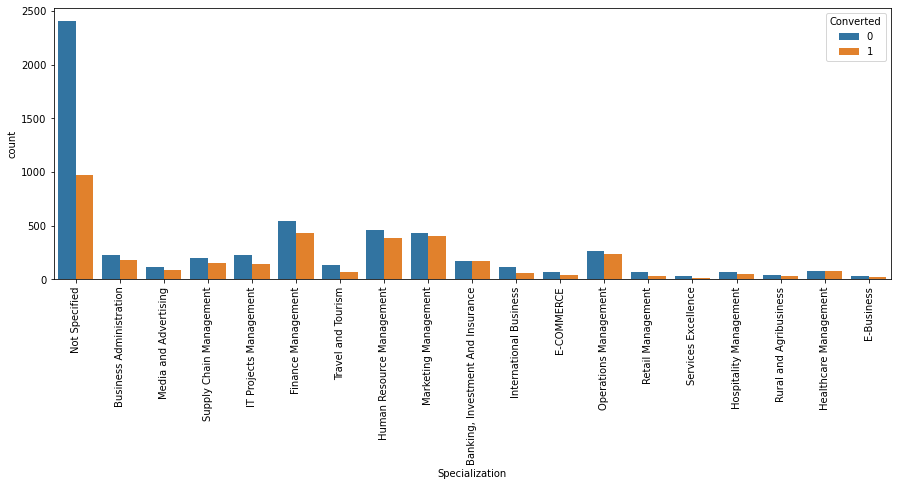

In [638]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.



In [639]:
#combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

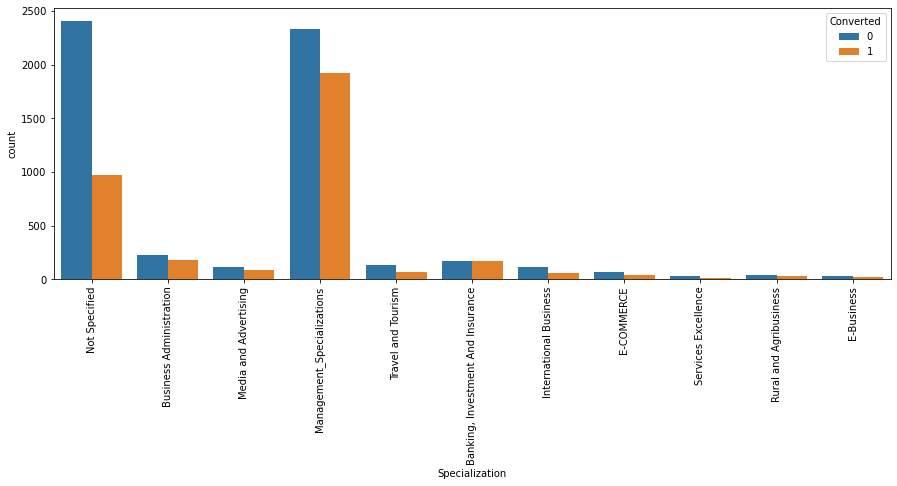

In [640]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [641]:
#What is your current occupation

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [642]:
#imputing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

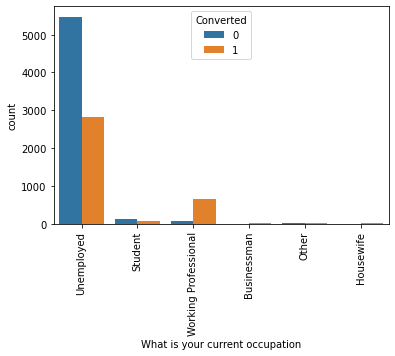

In [643]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.

In [644]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [645]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

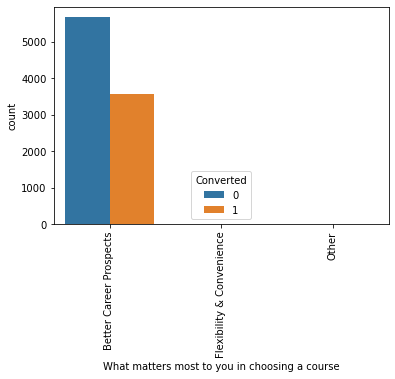

In [646]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [647]:
#checking value counts of variable
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [648]:
#checking percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [649]:
#checking value counts of Tag variable
lead['Tags'].value_counts(dropna=False)


NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [650]:
#replacing Nan values with "Not Specified"
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')

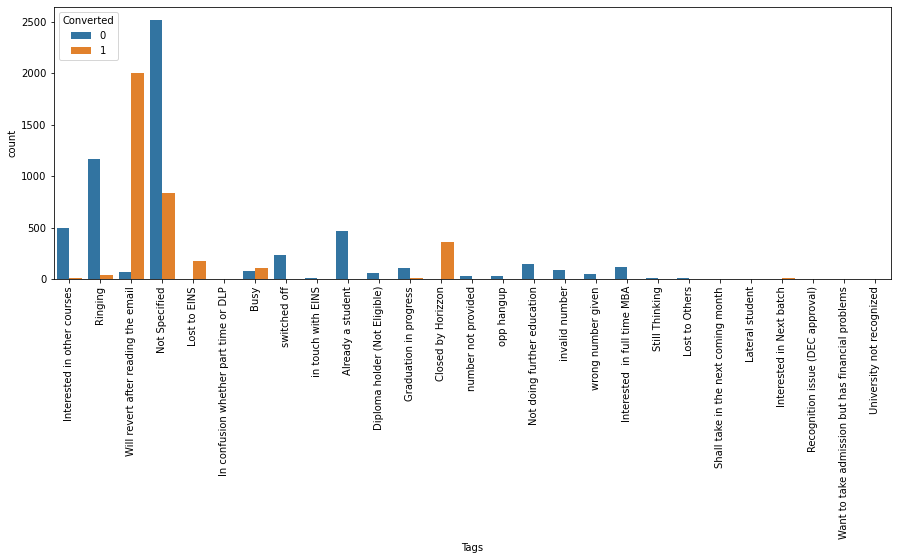

In [651]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(lead['Tags'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [652]:
#dropping city column
lead.drop(['City'], axis = 1, inplace=True)

In [653]:
#replacing tags with low frequency with "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [654]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [655]:
#replacing Nan Values and combining low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

We can group some of the lower frequency occuring labels under a common label 'Others'



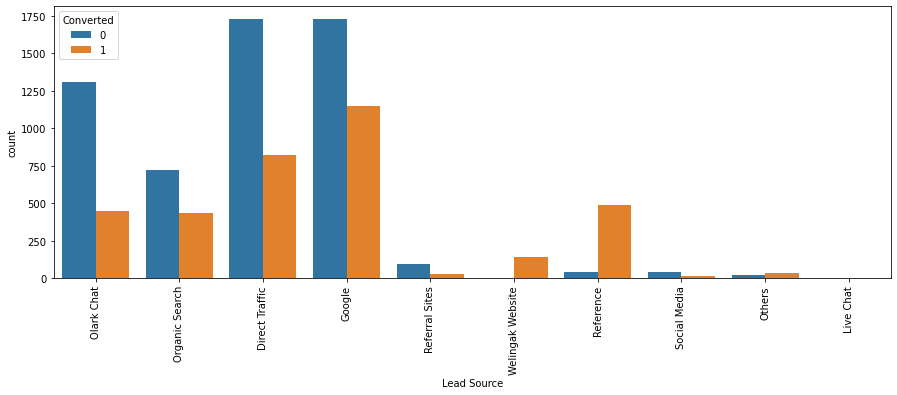

In [656]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(lead['Lead Source'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

Maximum number of leads are generated by Google and Direct traffic.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [657]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [658]:
#replacing Nan Values and combining low frequency values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [659]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [660]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead = lead.dropna()

In [661]:
#Checking percentage of Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [662]:
#Lead Origin
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

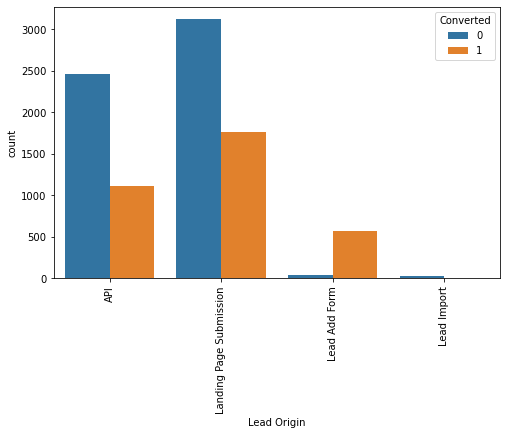

In [663]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(lead['Lead Origin'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

API and Landing Page Submission bring higher number of leads as well as conversion.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

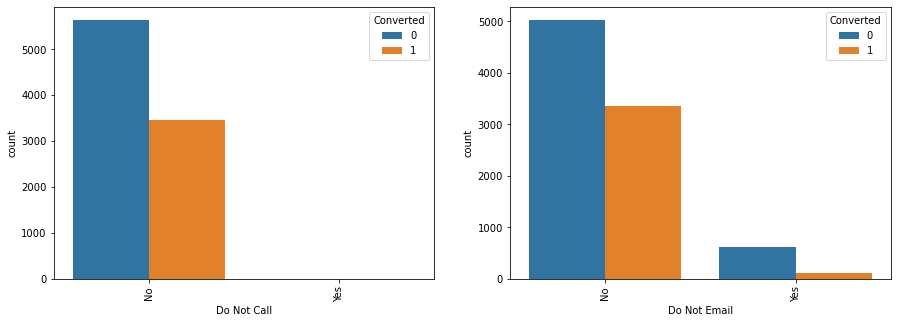

In [664]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead['Do Not Call'], hue=lead.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead['Do Not Email'], hue=lead.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [665]:
lead.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [666]:
#checking value counts of last Notable Activity
lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [667]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

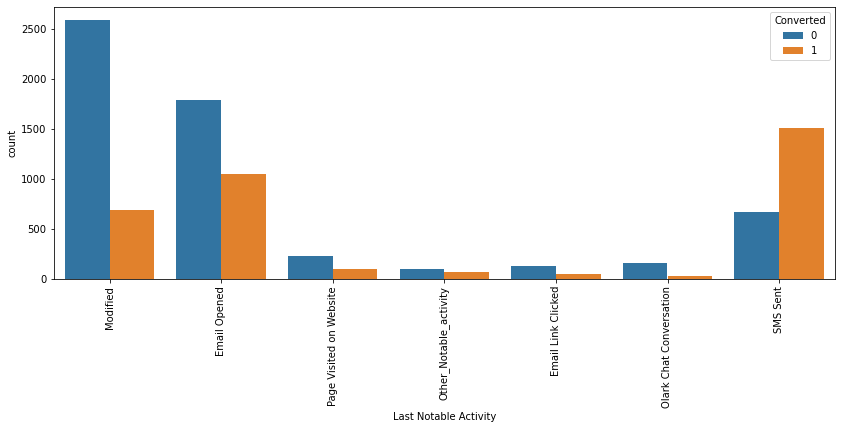

In [668]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [669]:
#checking value counts for variable

lead['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [670]:
# Drop 'What matters most to you in choosing a course'

lead.drop(['What matters most to you in choosing a course','Prospect ID', 'Lead Number','Do Not Call'], axis = 1, inplace=True)

In [671]:
# Check the number of null values again

lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [672]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

Now the data doesn't have any null values. Let's now check the percentage of rows that we have retained.



In [673]:
print(len(lead.index))
print(len(lead.index)/9240)

9103
0.9851731601731601


In [674]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


Now, clearly the variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables.



# Prepare the data for modelling


In [675]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.02043282434362

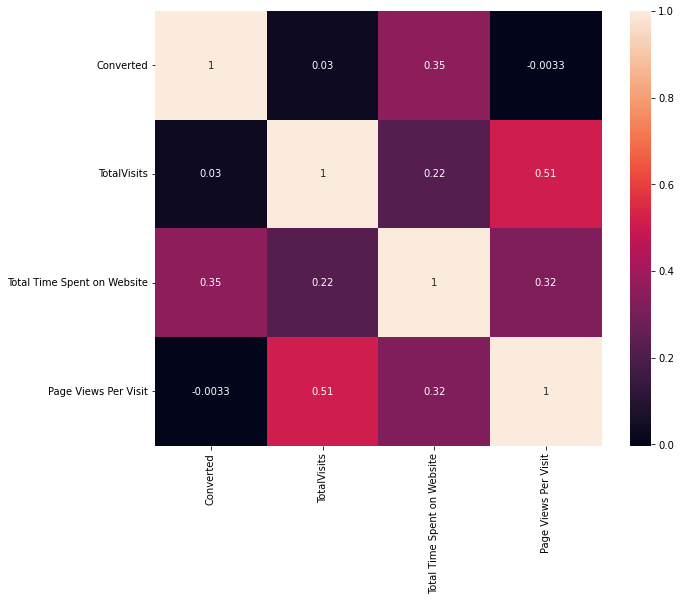

In [676]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead.corr(), annot=True)
plt.show()

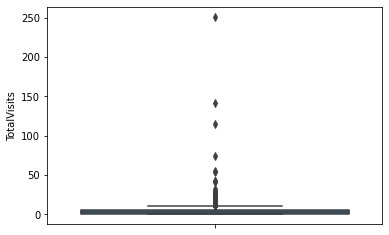

In [677]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()

We can see presence of outliers here



In [678]:
#checking percentile values for "Total Visits"

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

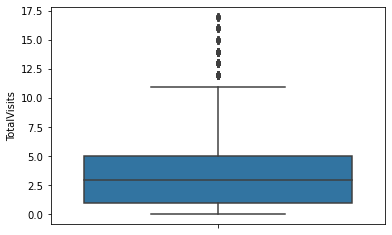

In [679]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()


In [680]:
lead.shape

(9020, 13)

In [681]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

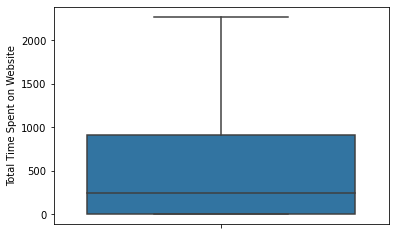

In [682]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column



In [683]:
#checking spread of "Page Views Per Visit"

lead['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

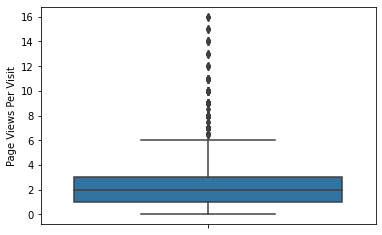

In [684]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

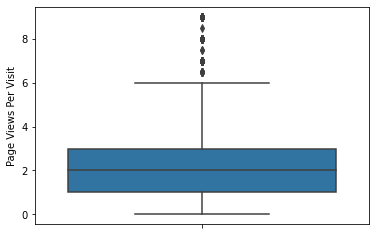

In [685]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

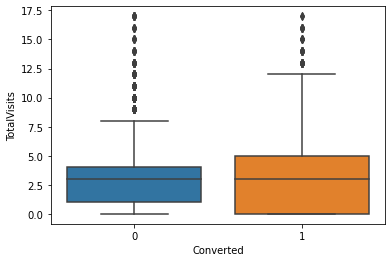

In [686]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

Inference

Median for converted and not converted leads are the close.

Nothng conclusive can be said on the basis of Total Visits

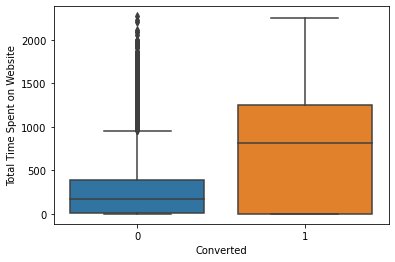

In [687]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

Inference

Leads spending more time on the website are more likely to be converted.

Website should be made more engaging to make leads spend more time.

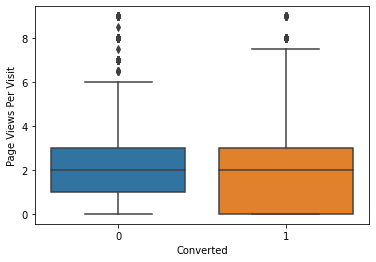

In [688]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

Inference

Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

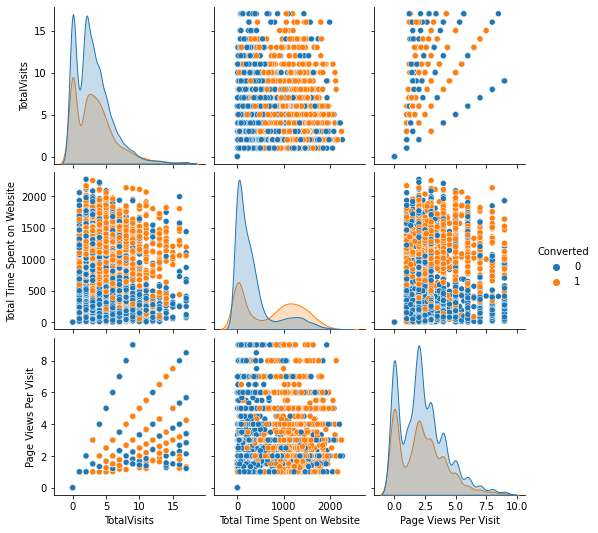

In [689]:
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

# Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [690]:
#getting a list of categorical columns

cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [691]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [692]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation']], drop_first=True)

lead = pd.concat([lead,dummy],1)

In [693]:
dummy = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)


In [694]:
dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [695]:
dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)


In [696]:
dummy = pd.get_dummies(lead['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [697]:
dummy = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [698]:
lead.drop(cat_cols,1,inplace = True)

In [699]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train-Test Split & Logistic Regression Model Building


In [700]:
# Import the required library

from sklearn.model_selection import train_test_split

In [701]:
# Putting response variable to y
y = lead['Converted']

y.head()

X=lead.drop('Converted', axis=1)

In [702]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [703]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

# Scaling

In [704]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [705]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.294118,0.655810,0.555556,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,0.176471,0.201144,0.333333,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.235294,0.055458,0.222222,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,0.117647,0.172975,0.222222,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.235294,0.513644,0.147778,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [706]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [707]:


from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [708]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('What is your current occupation_Housewife', False, 17),
 ('What is your current occupation_Other', False, 23),
 ('What is your current occupation_Student', False, 14),
 ('What is your current occupation_Unemployed', False, 12),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 6),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_International Business', False, 26),
 ('Specialization_Management_Specializations', False, 22),
 ('Specialization_Media and Advertising', False, 20),
 ('Specialization_Rural and Agribusiness', False, 24),
 ('Specialization_Services Excell

In [709]:
rfe.support_


array([ True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [710]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [711]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [712]:
# Import statsmodels

import statsmodels.api as sm

In [713]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1195.9
Date:                Sun, 06 Feb 2022   Deviance:                       2391.9
Time:                        17:27:34   Pearson chi2:                 7.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6121
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5194      0.118    -12.830      0.000      -1.752      -1.287
TotalVisits                                              1.0476      0.438      2.390      0.017       0.189       1.907
Total Time Spent on Website                              4.1500      0.243     17.051      0.000       3.673       4.627
Page Views Per Visit                                    -1.7337      0.413     -4.195      0.000      -2.544      -0.924
Lead Origin_Landing Page Submission                     -0.9436      0.137     -6.884      0.000      -1.212      -0.675
Lead Origin_Lead Add Form                                1.0524      0.458      2.299      0.021       0.155       1.949
What is your current occupation_Working Professional     0.9485      0.412      2.304      0.021       0.142       1.755
Specialization_Travel and Tourism                       -0.8702      0.475     -1.831      0.067      -1.802       0.061
Lead Source_Referral Sites                              -0.5566      0.473     -1.177      0.239      -1.483       0.370
Lead Source_Welingak Website                             4.1733      1.114      3.746      0.000       1.990       6.357
Last Activity_Converted to Lead                         -1.0327      0.378     -2.729      0.006      -1.774      -0.291
Last Activity_Email Bounced                             -1.3615      0.478     -2.847      0.004      -2.299      -0.424
Last Activity_Olark Chat Conversation                   -1.2018      0.314     -3.822      0.000      -1.818      -0.586
Last Activity_Page Visited on Website                   -0.9367      0.270     -3.467      0.001      -1.466      -0.407
Last Activity_SMS Sent                                   0.7736      0.261      2.969      0.003       0.263       1.284
Last Notable Activity_Email Link Clicked                -1.3603      0.507     -2.683      0.007      -2.354      -0.366
Last Notable Activity_Modified                          -0.7912      0.191     -4.133      0.000      -1.166      -0.416
Last Notable Activity_Olark Chat Conversation           -0.9592      0.579     -1.658      0.097      -2.093       0.175
Last Notable Activity_SMS Sent                           1.3991      0.290      4.820      0.000       0.830       1.968
Tags_Busy                                                0.7296      0.232      3.146      0.002       0.275       1.184
Tags_Closed by Horizzon                                  6.9579      1.025      6.787      0.000       4.948       8.967
Tags_Interested in other courses                        -2.2471      0.410     -5.474      0.000      -3.052      -1.443
Tags_Lost to EINS                                        5

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.




In [714]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [715]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_SMS Sent,7.59
17,Last Notable Activity_SMS Sent,7.42
2,Page Views Per Visit,6.11
0,TotalVisits,4.95
15,Last Notable Activity_Modified,3.53
3,Lead Origin_Landing Page Submission,3.41
1,Total Time Spent on Website,2.34
11,Last Activity_Olark Chat Conversation,2.20
24,Tags_Will revert after reading the email,2.15
4,Lead Origin_Lead Add Form,1.88


In [716]:
X_train.drop(['TotalVisits','Tags_Busy','Last Notable Activity_Email Link Clicked','Specialization_Travel and Tourism','Last Activity_Email Bounced','Last Activity_Page Visited on Website','Last Activity_Converted to Lead','What is your current occupation_Working Professional','Lead Origin_Landing Page Submission','Last Activity_Olark Chat Conversation'],1, inplace = True)


In [717]:
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.655810,0.555556,0,0,0,1,0,0,1,0,0,0,0,1,0
4696,0.201144,0.333333,0,0,0,1,0,0,1,0,0,0,0,1,0
3274,0.055458,0.222222,0,0,0,1,0,0,1,0,0,0,0,0,0
2164,0.172975,0.222222,0,0,0,0,1,0,0,0,1,0,0,0,0
1667,0.513644,0.147778,0,0,0,0,0,0,0,0,0,0,0,0,1


In [718]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.6
Date:                Sun, 06 Feb 2022   Deviance:                       2499.2
Time:                        17:27:59   Pearson chi2:                 7.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6054
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7160      0.111    -15.437      0.000      -1.934      -1.498
Total Time Spent on Website                       4.0816      0.232     17.606      0.000       3.627       4.536
Page Views Per Visit                             -2.1567      0.303     -7.124      0.000      -2.750      -1.563
Lead Origin_Lead Add Form                         1.3933      0.458      3.041      0.002       0.495       2.291
Lead Source_Referral Sites                       -0.1801      0.479     -0.376      0.707      -1.118       0.758
Lead Source_Welingak Website                      3.9444      1.112      3.546      0.000       1.764       6.125
Last Activity_SMS Sent                            1.3888      0.227      6.112      0.000       0.943       1.834
Last Notable Activity_Modified                   -1.3867      0.151     -9.164      0.000      -1.683      -1.090
Last Notable Activity_Olark Chat Conversation    -1.7684      0.474     -3.733      0.000      -2.697      -0.840
Last Notable Activity_SMS Sent                    0.8850      0.260      3.399      0.001       0.375       1.395
Tags_Closed by Horizzon                           7.1444      1.023      6.987      0.000       5.140       9.148
Tags_Interested in other courses                 -2.1172      0.407     -5.202      0.000      -2.915      -1.320
Tags_Lost to EINS                                 5.5044      0.608      9.058      0.000       4.313       6.695
Tags_Other_Tags                                  -2.5494      0.211    -12.090      0.000      -2.963      -2.136
Tags_Ringing                                     -3.5766      0.244    -14.644      0.000      -4.055      -3.098
Tags_Will revert after reading the email          4.5149      0.188     24.004      0.000       4.146       4.884
=================================================================================================================
"""

In [719]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,6.24
5,Last Activity_SMS Sent,6.17
1,Page Views Per Visit,2.51
0,Total Time Spent on Website,2.21
14,Tags_Will revert after reading the email,1.87
2,Lead Origin_Lead Add Form,1.82
6,Last Notable Activity_Modified,1.71
4,Lead Source_Welingak Website,1.35
12,Tags_Other_Tags,1.28
13,Tags_Ringing,1.28


In [720]:
#let's drop the ones with the high p-values
X_train.drop('Lead Source_Referral Sites', axis = 1, inplace = True)

In [721]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.7
Date:                Sun, 06 Feb 2022   Deviance:                       2499.3
Time:                        17:28:02   Pearson chi2:                 7.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6054
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7182      0.111    -15.473      0.000      -1.936      -1.501
Total Time Spent on Website                       4.0823      0.232     17.606      0.000       3.628       4.537
Page Views Per Visit                             -2.1620      0.302     -7.148      0.000      -2.755      -1.569
Lead Origin_Lead Add Form                         1.3938      0.458      3.043      0.002       0.496       2.292
Lead Source_Welingak Website                      3.9453      1.112      3.547      0.000       1.765       6.126
Last Activity_SMS Sent                            1.3914      0.227      6.125      0.000       0.946       1.837
Last Notable Activity_Modified                   -1.3856      0.151     -9.157      0.000      -1.682      -1.089
Last Notable Activity_Olark Chat Conversation    -1.7686      0.474     -3.734      0.000      -2.697      -0.840
Last Notable Activity_SMS Sent                    0.8845      0.260      3.397      0.001       0.374       1.395
Tags_Closed by Horizzon                           7.1469      1.023      6.990      0.000       5.143       9.151
Tags_Interested in other courses                 -2.1304      0.406     -5.242      0.000      -2.927      -1.334
Tags_Lost to EINS                                 5.5065      0.608      9.062      0.000       4.316       6.697
Tags_Other_Tags                                  -2.5484      0.211    -12.086      0.000      -2.962      -2.135
Tags_Ringing                                     -3.5753      0.244    -14.640      0.000      -4.054      -3.097
Tags_Will revert after reading the email          4.5148      0.188     24.005      0.000       4.146       4.883
=================================================================================================================
"""

In [722]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.24
4,Last Activity_SMS Sent,6.16
1,Page Views Per Visit,2.49
0,Total Time Spent on Website,2.21
13,Tags_Will revert after reading the email,1.87
2,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.71
3,Lead Source_Welingak Website,1.35
11,Tags_Other_Tags,1.28
12,Tags_Ringing,1.28


In [723]:
X_train.drop('Last Notable Activity_SMS Sent', axis = 1, inplace = True)

In [724]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.6
Date:                Sun, 06 Feb 2022   Deviance:                       2511.1
Time:                        17:28:18   Pearson chi2:                 7.76e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6265      0.106    -15.330      0.000      -1.835      -1.419
Total Time Spent on Website                       4.0689      0.231     17.597      0.000       3.616       4.522
Page Views Per Visit                             -2.2311      0.300     -7.444      0.000      -2.819      -1.644
Lead Origin_Lead Add Form                         1.3637      0.463      2.947      0.003       0.457       2.271
Lead Source_Welingak Website                      3.9333      1.117      3.522      0.000       1.744       6.122
Last Activity_SMS Sent                            2.0559      0.114     17.975      0.000       1.832       2.280
Last Notable Activity_Modified                   -1.7031      0.125    -13.600      0.000      -1.948      -1.458
Last Notable Activity_Olark Chat Conversation    -1.8578      0.475     -3.915      0.000      -2.788      -0.928
Tags_Closed by Horizzon                           7.3419      1.024      7.173      0.000       5.336       9.348
Tags_Interested in other courses                 -2.0864      0.405     -5.150      0.000      -2.880      -1.292
Tags_Lost to EINS                                 5.6682      0.610      9.299      0.000       4.473       6.863
Tags_Other_Tags                                  -2.4953      0.208    -11.990      0.000      -2.903      -2.087
Tags_Ringing                                     -3.4653      0.239    -14.474      0.000      -3.935      -2.996
Tags_Will revert after reading the email          4.5920      0.191     24.086      0.000       4.218       4.966
=================================================================================================================
"""

In [726]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,2.49
0,Total Time Spent on Website,2.20
12,Tags_Will revert after reading the email,1.83
2,Lead Origin_Lead Add Form,1.82
4,Last Activity_SMS Sent,1.56
5,Last Notable Activity_Modified,1.42
3,Lead Source_Welingak Website,1.35
10,Tags_Other_Tags,1.26
11,Tags_Ringing,1.26
7,Tags_Closed by Horizzon,1.25


# Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [790]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

9196    0.167005
4696    0.049211
3274    0.539719
2164    0.005443
1667    0.991214
7024    0.164305
8018    0.029761
778     0.141765
6942    0.002944
4440    0.088188
dtype: float64

In [732]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16700535, 0.04921149, 0.5397189 , 0.00544293, 0.99121374,
       0.16430489, 0.02976136, 0.14176549, 0.00294442, 0.08818836])

In [733]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.167005,9196
1,0,0.049211,4696
2,0,0.539719,3274
3,0,0.005443,2164
4,1,0.991214,1667


In [734]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.167005,9196,0
1,0,0.049211,4696,0
2,0,0.539719,3274,1
3,0,0.005443,2164,0
4,1,0.991214,1667,1


In [735]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3705  177]
 [ 285 2100]]


In [736]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9262805169937769


In [737]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [738]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8805031446540881

In [739]:
# Let us calculate specificity
TN / float(TN+FP)


0.9544049459041731

In [740]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04559505409582689


In [741]:
# positive predictive value 
print (TP / float(TP+FP))

0.922266139657444


In [742]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9285714285714286


# PLOTTING ROC CURVE


### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [743]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [744]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [587]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

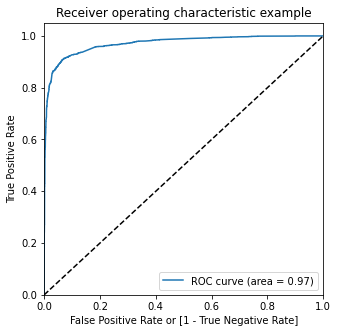

In [745]:
 draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the curve of the ROC is 0.97 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.



Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [746]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.167005,9196,0,1,1,0,0,0,0,0,0,0,0
1,0,0.049211,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.539719,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.005443,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.991214,1667,1,1,1,1,1,1,1,1,1,1,1


In [747]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.813946  0.970231  0.717929
0.2   0.2  0.906335  0.928721  0.892581
0.3   0.3  0.921813  0.914046  0.926584
0.4   0.4  0.924844  0.901048  0.939464
0.5   0.5  0.926281  0.880503  0.954405
0.6   0.6  0.927397  0.857442  0.970376
0.7   0.7  0.914154  0.803774  0.981968
0.8   0.8  0.905537  0.774423  0.986090
0.9   0.9  0.888783  0.721593  0.991499


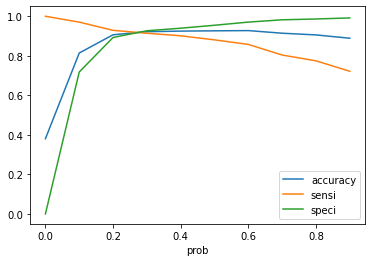

In [748]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


As we can see that around 0.3, we get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.



In [749]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.167005,9196,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.049211,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.539719,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.005443,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.991214,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [750]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.167005,9196,0,17
1,0,0.049211,4696,0,5
2,0,0.539719,3274,1,54
3,0,0.005443,2164,0,1
4,1,0.991214,1667,1,99


In [751]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9218126695388543

In [752]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2


array([[3597,  285],
       [ 205, 2180]])

In [595]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [753]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8805031446540881

In [755]:
# Let us calculate specificity
TN / float(TN+FP)

0.9544049459041731

In [756]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04559505409582689


In [757]:
# Positive predictive value 
print (TP / float(TP+FP))

0.922266139657444


In [758]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.922266139657444

In [759]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8805031446540881

In [760]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 205, 2180]])

In [761]:
from sklearn.metrics import precision_score, recall_score


In [762]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8843813387423936

In [763]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.9140461215932913

In [764]:
from sklearn.metrics import precision_recall_curve

In [765]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

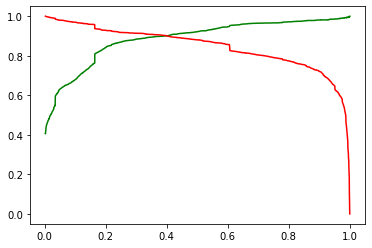

In [766]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.18%

Sensitivity : 88.05%

Specificity : 95.44%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [798]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Specialization_Travel and Tourism,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.294118,0.145327,0.277778,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
984,0.176471,0.085514,0.333333,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8135,0.117647,0.426636,0.222222,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6915,0.235294,0.065888,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,0.176471,0.117757,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [805]:
X_test = X_test[col]
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [807]:
#dropping column from X_test
X_test.drop(['TotalVisits',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Referral Sites','Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_SMS Sent', 'Tags_Busy'],1,inplace=True)


In [808]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,1.0,0.145327,0.277778,0,0,1,0,0,0,0,0,0,1,0
984,1.0,0.085514,0.333333,0,0,1,1,0,0,0,0,1,0,0
8135,1.0,0.426636,0.222222,0,0,1,0,0,0,0,0,0,0,0
6915,1.0,0.065888,0.222222,0,0,0,0,0,0,0,0,0,1,0
2712,1.0,0.117757,0.333333,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,1.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0
1420,1.0,0.185514,0.222222,0,0,0,0,1,0,0,0,0,0,0
5996,1.0,0.145327,0.222222,0,0,0,1,0,1,0,0,0,0,0
4143,1.0,0.038318,0.111111,0,0,0,1,0,0,1,0,0,0,0


# Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [809]:
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

7681    0.044603
984     0.015296
8135    0.841507
6915    0.004871
2712    0.937082
244     0.001183
4698    0.008373
8287    0.034570
6791    0.984866
8970    0.006358
dtype: float64

In [810]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [811]:
# Let's see the head
y_pred_1.head()

,0
7681,0.044603
984,0.015296
8135,0.841507
6915,0.004871
2712,0.937082


In [812]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [813]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [814]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [815]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [816]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.044603
1,0,984,0.015296
2,0,8135,0.841507
3,0,6915,0.004871
4,1,2712,0.937082


In [817]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [818]:
y_pred_final.head()


,Converted,Prospect ID,Converted_prob
0,0,7681,0.044603
1,0,984,0.015296
2,0,8135,0.841507
3,0,6915,0.004871
4,1,2712,0.937082


In [819]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [820]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.044603,4
1,984,0,0.015296,2
2,8135,0,0.841507,84
3,6915,0,0.004871,0
4,2712,1,0.937082,94


In [821]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [822]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.044603,4,0
1,984,0,0.015296,2,0
2,8135,0,0.841507,84,1
3,6915,0,0.004871,0,0
4,2712,1,0.937082,94,1


In [823]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9270290394638868

In [824]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  83,  927]])

In [825]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [826]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9178217821782179

In [827]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325775656324582

In [828]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8913461538461539

In [829]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9178217821782179

Observation:

After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.70%

Sensitivity : 91.78%

Specificity : 93.25%

Final Observation:
    
Let us compare the values obtained for Train & Test:

Train Data: 
    
Accuracy : 92.18%

Sensitivity : 88.05%

Specificity : 95.44%

# The Model seems to predict the Conversion Rate very well